결측치를 채우고 3년 이상을 볼 것 vs 3년이상 중을 볼 것 (우선 후자 선택)

In [106]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [165]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

In [2]:
pd.options.display.float_format = '{:.0f}'.format
# pd.reset_option('display.float_format

In [3]:
df = pd.read_csv('./data/company_nps_data.csv', encoding='cp949', dtype={'년도':str, '월':str})
# 연월 추가
for i in range(1, 10):
    df.loc[df['월']==f'{i}','월'] = f'0{i}'
df['연월'] = df['년도'] + '-' + df['월']

#년도, 월 다시 int값으로
for i in range(2015, 2020):
    df.loc[df['년도']==f'{i}','년도'] = i
for i in range(1, 10):
    df.loc[df['월']==f'0{i}','월'] = i
for i in range(10, 13):
    df.loc[df['월']==f'{i}','월'] = i
    
# 평균월급 feature
df['평균월급']=df['월별_연금보험료']*100/9/df['월별_직원수']
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월,평균월급
0,233757,41688077,2018,7,8912380,36,2018-07,2750735
1,123464,1760695,2018,3,942380,5,2018-03,2094178
2,342124,3221341,2018,7,781180,4,2018-07,2169944
3,386420,4815584,2015,11,3795900,14,2015-11,3012619
4,129243,9799736,2018,10,40724680,151,2018-10,2996665
...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,2017-02,2427010
99797,239388,1045021,2018,10,1428800,9,2018-10,1763951
99798,272304,181898,2018,3,392560,4,2018-03,1090444
99799,362194,2100218,2018,12,874780,3,2018-12,3239926


In [4]:
len_dict = {} # 기간 별 회사 수
id_dict = {} # 기간 별 회사들
df_by_id = df.groupby('회사ID')
for co_id, tmp in df_by_id:
    if id_dict.get(tmp.shape[0]):
        id_dict[tmp.shape[0]].append(co_id)
    else:
        id_dict[tmp.shape[0]] = [co_id]
    len_dict[tmp.shape[0]] = len_dict.get(tmp.shape[0], 0) + 1
    
# id_dict  : key → 데이터 기간, value → 해당 기간의 회사들   
# len_dict : key → 데이터 기간, value → 회사 개수  


In [5]:
## 36개월 이상인 기업의 수
candidates_co =[]  # 해당 기업들
for i in range(32, 51):
    if i in id_dict: 
        candidates_co.extend(id_dict[i])

candi = df.loc[df['회사ID'].isin(candidates_co)]['회사ID'].unique()
candi.sort()

df_dict = {}
for i in candi:
    df_dict[i] = df_by_id.get_group(i).sort_values(['년도','월'])

In [6]:
df_dict.keys()

dict_keys([14271, 59533, 122968, 123082, 123219, 123235, 123464, 123649, 123882, 124181, 124281, 124386, 124388, 124463, 124535, 124918, 125197, 125878, 125958, 125987, 126282, 126521, 126538, 126606, 126664, 126674, 126772, 126802, 126814, 126831, 126983, 127060, 127065, 127090, 127142, 127180, 127202, 127366, 127503, 127511, 127669, 127732, 127839, 128076, 128149, 128174, 128264, 128405, 128415, 128440, 128485, 128488, 128539, 128638, 128723, 128896, 128916, 129184, 129243, 129310, 129370, 129377, 129436, 129486, 129633, 129652, 129718, 129774, 129828, 129861, 129895, 130023, 130084, 130128, 130191, 130203, 130261, 130281, 130322, 130344, 130386, 130387, 130428, 130577, 130647, 130729, 130756, 130899, 130911, 130927, 130966, 131049, 131114, 131228, 131293, 131312, 131345, 131397, 131440, 131485, 131606, 131635, 131723, 131872, 131916, 132029, 132056, 132156, 132164, 132219, 132335, 132345, 132359, 132457, 132513, 132623, 132760, 132841, 132864, 132930, 133019, 133041, 133175, 133298,

In [7]:
# 6개월간의 평균 직원수(결측 달이 있는 경우 달의 개수로 나눠준다.)
상반기 = [1, 2, 3, 4, 5, 6]
하반기 = [7, 8, 9, 10, 11, 12]
for key in df_dict:
    tmp_df = df_dict[key]
    tmp_gp = tmp_df.groupby(['년도'])
    i = 0
    for year, df_year in tmp_gp:
        상반기_조건 = (tmp_df['년도'] == year) & (tmp_df['월'].isin(상반기))
        하반기_조건 = (tmp_df['년도'] == year) & (tmp_df['월'].isin(하반기))
        tmp_df.loc[상반기_조건, '반기_평균_직원수'] = np.round(tmp_df.loc[상반기_조건, '월별_직원수'].mean())
        tmp_df.loc[상반기_조건, '반기'] = '상반기'
    
        tmp_df.loc[하반기_조건, '반기_평균_직원수'] = np.round(tmp_df.loc[하반기_조건, '월별_직원수'].mean())
        tmp_df.loc[하반기_조건, '반기'] = '하반기'
    df_dict[key] = tmp_df

In [9]:
# # 평균 매출 250억 이상 & 2019년 12월에 직원수 40명 이상
candi = []
for key in df_dict:
    df_tmp = df_dict[key]
    if 10**(-5)*np.mean(df_tmp['연매출액'])<250:
        if df_tmp.tail(1)['월별_직원수'].values[0] >= 40:
            candi.append(key)
print(candi)
print(f'평균 매출 250억 이상이고 존재 데이터의 마지막 달에 직원 수가 40인 이상 : {len(candi)}')

[129243, 129633, 129774, 129895, 130261, 130428, 130756, 130966, 131312, 131345, 131440, 131606, 131635, 132029, 132219, 132457, 132513, 132623, 132841, 132864, 133041, 133175, 133348, 133364, 133517, 133518, 133531, 133537, 133713, 133722, 133949, 134153, 134369, 134428, 134575, 134582, 134599, 134659, 134715, 134911, 135042, 135158, 135298, 135330, 135559, 135843, 135894, 136269, 136290, 136443, 136949, 137159, 137536, 137581, 137721, 137732, 137733, 137755, 137988, 138453, 138517, 139044, 139158, 139605, 139676, 140080, 140348, 140468, 140522, 140535, 141293, 227942, 231110, 231625, 232041, 232218, 232257, 232340, 294962, 295938, 296209, 296572, 296785, 296819, 297081, 297105, 297130, 297682, 298404, 380943, 381281, 381981, 382029, 382160, 394728, 394749, 394802, 394849, 403826, 403909, 404055, 404120, 404139, 404192, 404425, 404702, 405196, 405759, 426723, 440134, 440592, 440603, 440633, 440679, 440855, 440967, 440982, 441018, 441107, 441397, 441565, 441821, 442303, 469789, 469890,

In [10]:
매출표 = pd.DataFrame(columns = ['회사ID',2015, 2016, 2017, 2018,2019])
for co_id in candi:
    tmp_df = df_dict[co_id]
    data = {'회사ID':co_id,2015:np.nan, 2016:np.nan, 2017:np.nan, 2018:np.nan, 2019:np.nan}
    
    if sum(tmp_df['년도'].isin([2015])):
        val1 = tmp_df.loc[tmp_df['년도']==2015, '연매출액'].unique()[0]
        data[2015] = val1
    if sum(tmp_df['년도'].isin([2016])):
        val1 = tmp_df.loc[tmp_df['년도']==2016, '연매출액'].unique()[0]
        data[2016] = val1
    if sum(tmp_df['년도'].isin([2017])):
        val1 = tmp_df.loc[tmp_df['년도']==2017, '연매출액'].unique()[0]
        data[2017] = val1
    if sum(tmp_df['년도'].isin([2018])):
        val1 = tmp_df.loc[tmp_df['년도']==2018, '연매출액'].unique()[0]
        data[2018] = val1
    if sum(tmp_df['년도'].isin([2019])):
        val1 = tmp_df.loc[tmp_df['년도']==2019, '연매출액'].unique()[0]
        data[2019] = val1
    매출표 = 매출표.append(data, ignore_index=True)
매출표

,회사ID,2015,2016,2017,2018,2019
0,129243,7835388,8202009,8230350,9799736,nan
1,129633,6741942,9612866,16640671,18221730,nan
2,129774,18550523,16371102,16930294,21154740,nan
3,129895,14109941,15176139,12460487,14830638,nan
4,130261,nan,nan,20849316,15452289,15498542
...,...,...,...,...,...,...
129,473265,3443475,2111857,1437836,nan,3233267
130,507086,80680852,18652340,20186195,18281261,nan
131,507230,13947020,12750976,13873075,11954108,nan
132,507235,10822969,10818766,10696323,10642404,nan


In [11]:
# 결측치 채우기
y, x = 매출표.shape
for i in range(y):
    tmp = 매출표.loc[i].isnull()
    if (tmp[2016]==True) and (tmp[2015]==False) and (tmp[2017]==False): 
        매출표.loc[i,2016] = (매출표.loc[i,2015] + 매출표.loc[i,2017])/2
    if (tmp[2017]==True) and (tmp[2016]==False) and (tmp[2018]==False):
        매출표.loc[i,2017] = (매출표.loc[i,2016] + 매출표.loc[i,2018])/2
    if (tmp[2018]==True) and (tmp[2017]==False) and (tmp[2019]==False):
        매출표.loc[i,2017] = (매출표.loc[i,2016] + 매출표.loc[i,2018])/2
매출표

,회사ID,2015,2016,2017,2018,2019
0,129243,7835388,8202009,8230350,9799736,nan
1,129633,6741942,9612866,16640671,18221730,nan
2,129774,18550523,16371102,16930294,21154740,nan
3,129895,14109941,15176139,12460487,14830638,nan
4,130261,nan,nan,20849316,15452289,15498542
...,...,...,...,...,...,...
129,473265,3443475,2111857,nan,nan,3233267
130,507086,80680852,18652340,20186195,18281261,nan
131,507230,13947020,12750976,13873075,11954108,nan
132,507235,10822969,10818766,10696323,10642404,nan


In [12]:
# 열 추가
매출표['to_2016'] = np.nan
매출표['to_2017'] = np.nan
매출표['to_2018'] = np.nan
매출표['to_2019'] = np.nan
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019
0,129243,7835388,8202009,8230350,9799736,nan,nan,nan,nan,nan
1,129633,6741942,9612866,16640671,18221730,nan,nan,nan,nan,nan
2,129774,18550523,16371102,16930294,21154740,nan,nan,nan,nan,nan
3,129895,14109941,15176139,12460487,14830638,nan,nan,nan,nan,nan
4,130261,nan,nan,20849316,15452289,15498542,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
129,473265,3443475,2111857,nan,nan,3233267,nan,nan,nan,nan
130,507086,80680852,18652340,20186195,18281261,nan,nan,nan,nan,nan
131,507230,13947020,12750976,13873075,11954108,nan,nan,nan,nan,nan
132,507235,10822969,10818766,10696323,10642404,nan,nan,nan,nan,nan


In [13]:
y, x = 매출표.shape
for i in range(y):
    tmp = 매출표.loc[i].isnull()
    if (tmp[2016]==False) and (tmp[2015]==False): 
        val1, val2 = 매출표.loc[i,2015], 매출표.loc[i,2016]
        매출표.loc[i,'to_2016'] = round((val2/val1-1)*100)
    if (tmp[2017]==False) and (tmp[2016]==False): 
        val1, val2 = 매출표.loc[i,2016], 매출표.loc[i,2017]
        매출표.loc[i,'to_2017'] = round((val2/val1-1)*100)
    if (tmp[2018]==False) and (tmp[2017]==False): 
        val1, val2 = 매출표.loc[i, 2017], 매출표.loc[i, 2018]
        매출표.loc[i,'to_2018'] = round((val2/val1-1)*100)
    if (tmp[2019]==False) and (tmp[2018]==False): 
        val1, val2 = 매출표.loc[i,2018], 매출표.loc[i,2019]
        매출표.loc[i,'to_2019'] = round((val2/val1-1)*100)
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019
0,129243,7835388,8202009,8230350,9799736,nan,5,0,19,nan
1,129633,6741942,9612866,16640671,18221730,nan,43,73,10,nan
2,129774,18550523,16371102,16930294,21154740,nan,-12,3,25,nan
3,129895,14109941,15176139,12460487,14830638,nan,8,-18,19,nan
4,130261,nan,nan,20849316,15452289,15498542,nan,nan,-26,0
...,...,...,...,...,...,...,...,...,...,...
129,473265,3443475,2111857,nan,nan,3233267,-39,nan,nan,nan
130,507086,80680852,18652340,20186195,18281261,nan,-77,8,-9,nan
131,507230,13947020,12750976,13873075,11954108,nan,-9,9,-14,nan
132,507235,10822969,10818766,10696323,10642404,nan,0,-1,-1,nan


In [14]:
# 매출표 행추가
매출표['마지막_연도'] = np.nan
매출표['마지막_연도_매출액'] = np.nan
매출표['3년_매출_성장률'] = np.nan
매출표['마지막_증가액'] = np.nan
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019,마지막_연도,마지막_연도_매출액,3년_매출_성장률,마지막_증가액
0,129243,7835388,8202009,8230350,9799736,nan,5,0,19,nan,nan,nan,nan,nan
1,129633,6741942,9612866,16640671,18221730,nan,43,73,10,nan,nan,nan,nan,nan
2,129774,18550523,16371102,16930294,21154740,nan,-12,3,25,nan,nan,nan,nan,nan
3,129895,14109941,15176139,12460487,14830638,nan,8,-18,19,nan,nan,nan,nan,nan
4,130261,nan,nan,20849316,15452289,15498542,nan,nan,-26,0,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,473265,3443475,2111857,nan,nan,3233267,-39,nan,nan,nan,nan,nan,nan,nan
130,507086,80680852,18652340,20186195,18281261,nan,-77,8,-9,nan,nan,nan,nan,nan
131,507230,13947020,12750976,13873075,11954108,nan,-9,9,-14,nan,nan,nan,nan,nan
132,507235,10822969,10818766,10696323,10642404,nan,0,-1,-1,nan,nan,nan,nan,nan


In [15]:
# 매출표 분석 3년_매출_성장률

y, x = 매출표.shape
for i in range(y):
    flags = 매출표.loc[i, ['to_2016', 'to_2017', 'to_2018', 'to_2019']].notnull().tolist()
    if sum(flags[2:])==2:
        매출표.loc[i, '마지막_연도_매출액'] = 매출표.loc[i, 2019]
        매출표.loc[i, '마지막_연도'] = 2019
        매출표.loc[i, '3년_매출_성장률'] = round(매출표.loc[i, ['to_2017', 'to_2018', 'to_2019']].mean())
        매출표.loc[i, '마지막_증가액'] = 매출표.loc[i, 2019] - 매출표.loc[i, 2018]

    elif sum(flags[1:-1])==2:
        매출표.loc[i, '마지막_연도_매출액'] = 매출표.loc[i, 2018]
        매출표.loc[i, '마지막_연도'] = 2018
        매출표.loc[i, '3년_매출_성장률'] =round(매출표.loc[i, ['to_2016', 'to_2017', 'to_2018']].mean())
        매출표.loc[i, '마지막_증가액'] = 매출표.loc[i, 2018] - 매출표.loc[i, 2017]


    elif sum(flags[:2])==2:
        매출표.loc[i, '마지막_연도_매출액'] = 매출표.loc[i, 2017]
        매출표.loc[i, '마지막_연도'] = 2017
        매출표.loc[i, '3년_매출_성장률'] = round(매출표.loc[i, ['to_2015', 'to_2016', 'to_2017']].mean())
        매출표.loc[i, '마지막_증가액'] = 매출표.loc[i, 2017] - 매출표.loc[i, 2016]

매출표 = 매출표.dropna(subset=['마지막_연도'])
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019,마지막_연도,마지막_연도_매출액,3년_매출_성장률,마지막_증가액
0,129243,7835388,8202009,8230350,9799736,nan,5,0,19,nan,2018,9799736,8,1569386
1,129633,6741942,9612866,16640671,18221730,nan,43,73,10,nan,2018,18221730,42,1581059
2,129774,18550523,16371102,16930294,21154740,nan,-12,3,25,nan,2018,21154740,5,4224446
3,129895,14109941,15176139,12460487,14830638,nan,8,-18,19,nan,2018,14830638,3,2370151
4,130261,nan,nan,20849316,15452289,15498542,nan,nan,-26,0,2019,15498542,-13,46253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,471337,5009682,5095404,5193795,5198738,nan,2,2,0,nan,2018,5198738,1,4943
130,507086,80680852,18652340,20186195,18281261,nan,-77,8,-9,nan,2018,18281261,-26,-1904934
131,507230,13947020,12750976,13873075,11954108,nan,-9,9,-14,nan,2018,11954108,-5,-1918967
132,507235,10822969,10818766,10696323,10642404,nan,0,-1,-1,nan,2018,10642404,-1,-53919


In [16]:
매출표 = 매출표[(매출표['3년_매출_성장률'] >= 20) |  (매출표['마지막_증가액'] >= 1000_0000)]

In [17]:
매출표

,회사ID,2015,2016,2017,2018,2019,to_2016,to_2017,to_2018,to_2019,마지막_연도,마지막_연도_매출액,3년_매출_성장률,마지막_증가액
1,129633,6741942,9612866,16640671,18221730,nan,43,73,10,nan,2018,18221730,42,1581059
7,130966,16265524,19168584,26363012,29489552,nan,18,38,12,nan,2018,29489552,23,3126540
11,131606,8027982,8489981,15154199,18496928,nan,6,78,22,nan,2018,18496928,35,3342729
13,132029,1742823,2547154,5159831,3166735,nan,46,103,-39,nan,2018,3166735,37,-1993096
20,133041,nan,2058877,2950495,4727235,nan,nan,43,60,nan,2018,4727235,52,1776740
23,133364,6426061,9937977,12051872,14473868,nan,55,21,20,nan,2018,14473868,32,2421996
25,133518,7916606,11247481,14565037,18642904,nan,42,29,28,nan,2018,18642904,33,4077867
33,134428,9352901,8099393,13136525,20842109,nan,-13,62,59,nan,2018,20842109,36,7705584
36,134599,6500799,7972463,17819592,19928116,nan,23,124,12,nan,2018,19928116,53,2108524
43,135330,5913074,7295688,8135619,10320464,nan,23,12,27,nan,2018,10320464,21,2184845


In [18]:
매출표.shape

(29, 14)

In [19]:
candi = 매출표['회사ID'].tolist()

In [20]:
# 직원 수
# 2015년 11월 ~ 2019년 12월
날짜 = df.sort_values(['년도','월'])['연월'].unique().tolist()
날짜.insert(0, '회사ID')
직원표 = pd.DataFrame(columns = 날짜)

for co_id in candi:
    data = {x:np.nan for x in 날짜}
    data['회사ID'] = co_id
    tmp_df = df_dict[co_id]
    for a, b in zip(tmp_df['연월'], tmp_df['월별_직원수']):
        data[a] = b
    직원표 = 직원표.append(data, ignore_index=True)
        
직원표        

,회사ID,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,129633,11,11,11,10,11,13,14,15,16,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,130966,94,92,91,89,92,97,96,92,91,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,131606,44,41,37,39,40,48,53,55,48,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,132029,26,26,28,30,28,30,34,34,31,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,133041,nan,nan,46,47,47,48,45,51,57,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,133364,48,51,55,59,57,63,69,67,70,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,133518,47,47,49,53,50,51,52,52,54,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,134428,55,58,59,59,59,60,60,59,59,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,134599,44,44,42,41,40,40,42,43,43,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,135330,33,38,42,42,43,45,46,51,48,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [21]:
# 평균 직원 수
상반기 = [1, 2, 3, 4, 5, 6]
하반기 = [7, 8, 9, 10, 11, 12]
평균_직원표 = pd.DataFrame(columns = ['회사ID']+ [f'{i}_'+ s + '반기' for i in range(2015, 2020) for s in ['상', '하']])
for co_id in candi:
    data = {f'{i}_'+ s + '반기' : np.nan for i in range(2015, 2020) for s in ['상', '하']}
    data['회사ID'] = co_id
    tmp_df = df_dict[co_id]
    tmp_gp = tmp_df.groupby(['년도'])
    for year, df_year in tmp_gp:
        상반기_조건 = (tmp_df['년도'] == year) & (tmp_df['월'].isin(상반기))
        하반기_조건 = (tmp_df['년도'] == year) & (tmp_df['월'].isin(하반기))
        data[f'{year}_상반기'] =  np.round(tmp_df.loc[상반기_조건, '월별_직원수'].mean())
        data[f'{year}_하반기'] =  np.round(tmp_df.loc[하반기_조건, '월별_직원수'].mean())
    평균_직원표 = 평균_직원표.append(data, ignore_index=True)

평균_직원표

,회사ID,2015_상반기,2015_하반기,2016_상반기,2016_하반기,2017_상반기,2017_하반기,2018_상반기,2018_하반기,2019_상반기,2019_하반기
0,129633,nan,11,12,16,56,97,120,133,nan,nan
1,130966,nan,93,93,88,91,92,96,102,nan,nan
2,131606,nan,42,45,50,63,86,92,92,nan,nan
3,132029,nan,26,31,36,58,47,40,40,nan,nan
4,133041,nan,nan,47,57,69,66,58,57,nan,nan
5,133364,nan,50,62,72,68,70,66,60,nan,nan
6,133518,nan,47,51,58,66,71,65,72,nan,nan
7,134428,nan,56,59,61,65,54,55,46,nan,nan
8,134599,nan,44,41,43,46,50,62,64,nan,nan
9,135330,nan,36,45,44,46,51,57,58,nan,nan


In [22]:
평균_직원표['2015to2016'] = (평균_직원표['2016_상반기'] - 평균_직원표['2015_하반기'])/평균_직원표['2015_하반기']*100
평균_직원표['2016상to2016하'] = (평균_직원표['2016_하반기'] - 평균_직원표['2016_상반기'])/평균_직원표['2016_상반기']*100
평균_직원표['2016to2017'] = (평균_직원표['2017_상반기'] - 평균_직원표['2016_하반기'])/평균_직원표['2016_하반기']*100
평균_직원표['2017상to2017하'] = (평균_직원표['2017_하반기'] - 평균_직원표['2017_상반기'])/평균_직원표['2017_상반기']*100
평균_직원표['2017to2018'] = (평균_직원표['2018_상반기'] - 평균_직원표['2017_하반기'])/평균_직원표['2017_하반기']*100
평균_직원표['2018상to2018하'] = (평균_직원표['2018_하반기'] - 평균_직원표['2018_상반기'])/평균_직원표['2018_상반기']*100
평균_직원표['2018to2019'] = (평균_직원표['2019_상반기'] - 평균_직원표['2018_하반기'])/평균_직원표['2018_하반기']*100
평균_직원표['2019상to2019하'] = (평균_직원표['2019_하반기'] - 평균_직원표['2019_상반기'])/평균_직원표['2019_상반기']*100
평균_직원표

,회사ID,2015_상반기,2015_하반기,2016_상반기,2016_하반기,2017_상반기,2017_하반기,2018_상반기,2018_하반기,2019_상반기,2019_하반기,2015to2016,2016상to2016하,2016to2017,2017상to2017하,2017to2018,2018상to2018하,2018to2019,2019상to2019하
0,129633,nan,11,12,16,56,97,120,133,nan,nan,9,33,250,73,24,11,nan,nan
1,130966,nan,93,93,88,91,92,96,102,nan,nan,0,-5,3,1,4,6,nan,nan
2,131606,nan,42,45,50,63,86,92,92,nan,nan,7,11,26,37,7,0,nan,nan
3,132029,nan,26,31,36,58,47,40,40,nan,nan,19,16,61,-19,-15,0,nan,nan
4,133041,nan,nan,47,57,69,66,58,57,nan,nan,nan,21,21,-4,-12,-2,nan,nan
5,133364,nan,50,62,72,68,70,66,60,nan,nan,24,16,-6,3,-6,-9,nan,nan
6,133518,nan,47,51,58,66,71,65,72,nan,nan,9,14,14,8,-8,11,nan,nan
7,134428,nan,56,59,61,65,54,55,46,nan,nan,5,3,7,-17,2,-16,nan,nan
8,134599,nan,44,41,43,46,50,62,64,nan,nan,-7,5,7,9,24,3,nan,nan
9,135330,nan,36,45,44,46,51,57,58,nan,nan,25,-2,5,11,12,2,nan,nan


In [23]:
평균_직원표['2016-2018_평균'] = 평균_직원표[['2016상to2016하', '2016to2017', '2017상to2017하', '2017to2018', '2018상to2018하']].mean(axis=1)

In [24]:
평균_직원표['2015-2019_평균'] =  평균_직원표[['2015to2016', '2016상to2016하', '2016to2017', '2017상to2017하', '2017to2018', '2018상to2018하', '2018to2019', '2019상to2019하']].mean(axis=1)

In [ ]:
# 평균_직원표[평균_직원표['2016-2018_평균']>=10]

In [ ]:
# tmp_list = list(set([123156, 127503, 130344, 127669, 381344, 420165, 294367, 294337, 294530, 440094,
#            127503, 420165, 130344, 132156, 132164, 470994, 268810, 380843, 394749, 233340, 472629,
#            403470, 420046, 420165, 420304, 469677,129633, 132029, 135559, 136290, 470994]))
# 평균_직원표.loc[평균_직원표['회사ID'].isin(tmp_list), ['회사ID', '2015-2019_평균']].sort_values('2015-2019_평균')

In [25]:
# 직원성장률 8
직원기준 = 평균_직원표.loc[평균_직원표['2016-2018_평균']>=8, '회사ID'].tolist()

In [26]:
날짜 = df.sort_values(['년도','월'])['연월'].unique().tolist()
날짜.insert(0, '회사ID')
월급표 = pd.DataFrame(columns = 날짜)

for co_id in candi:
    data = {x:np.nan for x in 날짜}
    data['회사ID'] = co_id
    tmp_df = df_dict[co_id]
    for a, b in zip(tmp_df['연월'], tmp_df['평균월급']):
        data[a] = b    
    월급표 = 월급표.append(data, ignore_index=True)
        
월급표      

,회사ID,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,129633,1641495,1616505,1616505,1694578,1813253,1688137,1816984,1858311,1885278,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,130966,2534844,2538713,2546249,2517593,2516399,2481860,2487558,2454268,2618281,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,131606,1816924,1841702,1851892,1835590,1831806,1757731,1732776,1732582,1805829,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,132029,2744162,2756701,2724079,2709141,2736690,2754881,2727837,2775190,2776100,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,133041,nan,nan,2016536,2022567,2026823,2035306,2041881,2050680,2089575,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,133364,2171023,2149198,2112000,2079831,2126195,2175859,2157771,2168796,2275324,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,133518,2009116,2000605,1953642,1975065,1979533,1972702,1967457,1967457,2005280,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,134428,2861487,2886716,2908215,2829876,2840030,2856748,2856748,2892320,3096083,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,134599,3709081,3709081,3795397,3831480,3822017,3822017,3839063,3847690,3953886,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,135330,1996613,1889795,1885053,1894577,1913307,1911230,1895836,1857342,1987023,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [27]:
#평균_월급표
기준1 = ['2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06']
기준2 = ['2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06']
기준3 = ['2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06']
기준4 = ['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06']
기준5 = ['2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']
평균_월급표 = pd.DataFrame(columns = ['회사ID']+ [f'기준{i}' for i in range(1, 6)])
for co_id in candi:
    data = {f'기준{i}':np.nan for i in range(1, 6)}
    data['회사ID'] = co_id
    tmp_df = df_dict[co_id]
    cri1 = tmp_df['연월'].isin(기준1)
    cri2 = tmp_df['연월'].isin(기준2)
    cri3 = tmp_df['연월'].isin(기준3)
    cri4 = tmp_df['연월'].isin(기준4)
    cri5 = tmp_df['연월'].isin(기준5)
        
    data['기준1'] =  np.round(tmp_df.loc[cri1, '평균월급'].mean())
    data['기준2'] =  np.round(tmp_df.loc[cri2, '평균월급'].mean())
    data['기준3'] =  np.round(tmp_df.loc[cri3, '평균월급'].mean())
    data['기준4'] =  np.round(tmp_df.loc[cri4, '평균월급'].mean())
    data['기준5'] =  np.round(tmp_df.loc[cri5, '평균월급'].mean())

    평균_월급표 = 평균_월급표.append(data, ignore_index=True)

평균_월급표

,회사ID,기준1,기준2,기준3,기준4,기준5
0,129633,1718221,1703793,1401521,1944096,nan
1,130966,2509685,2579337,2565912,2714895,nan
2,131606,1800125,1772157,1716564,1890017,nan
3,132029,2741085,2704747,3094923,3471061,nan
4,133041,2032299,2115770,2273850,2490379,nan
5,133364,2142584,2238945,2353345,2441911,nan
6,133518,1978197,2014776,2262792,2497924,nan
7,134428,2866518,2991220,3066715,3529466,nan
8,134599,3796978,3903944,4051954,4168632,nan
9,135330,1905469,2065112,2263805,2381357,nan


In [28]:
평균_월급표['1to2'] = (평균_월급표['기준2']/평균_월급표['기준1'] - 1)*100
평균_월급표['2to3'] = (평균_월급표['기준3']/평균_월급표['기준2'] - 1)*100
평균_월급표['3to4'] = (평균_월급표['기준4']/평균_월급표['기준3'] - 1)*100
평균_월급표['4to5'] = (평균_월급표['기준5']/평균_월급표['기준4'] - 1)*100
평균_월급표['평균'] = 평균_월급표[['1to2', '2to3', '3to4', '4to5']].mean(axis=1)


In [29]:
평균_월급표

,회사ID,기준1,기준2,기준3,기준4,기준5,1to2,2to3,3to4,4to5,평균
0,129633,1718221,1703793,1401521,1944096,nan,-1,-18,39,nan,7
1,130966,2509685,2579337,2565912,2714895,nan,3,-1,6,nan,3
2,131606,1800125,1772157,1716564,1890017,nan,-2,-3,10,nan,2
3,132029,2741085,2704747,3094923,3471061,nan,-1,14,12,nan,8
4,133041,2032299,2115770,2273850,2490379,nan,4,7,10,nan,7
5,133364,2142584,2238945,2353345,2441911,nan,4,5,4,nan,4
6,133518,1978197,2014776,2262792,2497924,nan,2,12,10,nan,8
7,134428,2866518,2991220,3066715,3529466,nan,4,3,15,nan,7
8,134599,3796978,3903944,4051954,4168632,nan,3,4,3,nan,3
9,135330,1905469,2065112,2263805,2381357,nan,8,10,5,nan,8


In [30]:
# 월급 성장률 4.3
월급기준 = 평균_월급표.loc[평균_월급표['평균']>=4.3, '회사ID'].tolist()

In [31]:
ans = []
for x in 월급기준:
    if x in 직원기준:
        ans.append(x)

In [32]:
ans = [int(i) for i in ans]

In [33]:
평균_월급표[평균_월급표['회사ID'] ==470994]['기준1'].values[0]

2177806.0

In [228]:
def 월급_그래프(i):
    
    y1 = 월급표[월급표['회사ID']==i].values[:,1:].ravel()
    x1 = 월급표.columns[1:]
    
    tmp = 평균_월급표.loc[평균_월급표['회사ID'] ==i]
    
    y2 = [tmp['기준1'].values[0]]*len(기준1) + [tmp['기준2'].values[0]]*len(기준2)\
        + [tmp['기준3'].values[0]]*len(기준3) + [tmp['기준4'].values[0]]*len(기준4) + [tmp['기준5'].values[0]]*len(기준5)
    
    df_tmp = pd.DataFrame(np.array([y2,y1]).T/10**4, index=x1, columns = ['연평균월급 (단위: 만원)', '한달 평균 월급 (단위: 만원)'])
    df_tmp.dropna().plot.line(title=f'{int(i)}의 월급 그래프', rot=45, style=['r','bo-'], markersize=4)
    plt.show()

    
def 직원_그래프(i):
    if i in df_dict:
        df_tmp = df_dict[i]
    else:
        df_tmp = df[df['회사ID']== i].sort_values(['년도', '월'])
    df_tmp.index = df_tmp['연월']
    df_tmp[['반기_평균_직원수 (단위 : 명수)']] =  df_tmp[['반기_평균_직원수']]
    df_tmp[['반기_평균_직원수 (단위 : 명수)']].plot(title=f'{int(i)}의 직원 그래프', rot=45)
    plt.show()

    
    
def 매출_그래프(i):
    if i in df_dict:
        df_tmp = df_dict[i]
    else:
        df_tmp = df[df['회사ID']== i].sort_values(['년도', '월'])
    df_tmp.index = df_tmp['연월']
    df_tmp['연매출액 (단위 : 억원)'] = df_tmp['연매출액']/10**5
    df_tmp[['연매출액 (단위 : 억원)']].plot(title=f'{int(i)}의 연매출 그래프', rot=45)
    plt.show()



In [ ]:
plt.plot()

In [35]:
평균_월급표

,회사ID,기준1,기준2,기준3,기준4,기준5,1to2,2to3,3to4,4to5,평균
0,129633,1718221,1703793,1401521,1944096,nan,-1,-18,39,nan,7
1,130966,2509685,2579337,2565912,2714895,nan,3,-1,6,nan,3
2,131606,1800125,1772157,1716564,1890017,nan,-2,-3,10,nan,2
3,132029,2741085,2704747,3094923,3471061,nan,-1,14,12,nan,8
4,133041,2032299,2115770,2273850,2490379,nan,4,7,10,nan,7
5,133364,2142584,2238945,2353345,2441911,nan,4,5,4,nan,4
6,133518,1978197,2014776,2262792,2497924,nan,2,12,10,nan,8
7,134428,2866518,2991220,3066715,3529466,nan,4,3,15,nan,7
8,134599,3796978,3903944,4051954,4168632,nan,3,4,3,nan,3
9,135330,1905469,2065112,2263805,2381357,nan,8,10,5,nan,8


In [225]:
def make_plot(i):
    직원_그래프(i)
    매출_그래프(i)
    월급_그래프(i)


C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


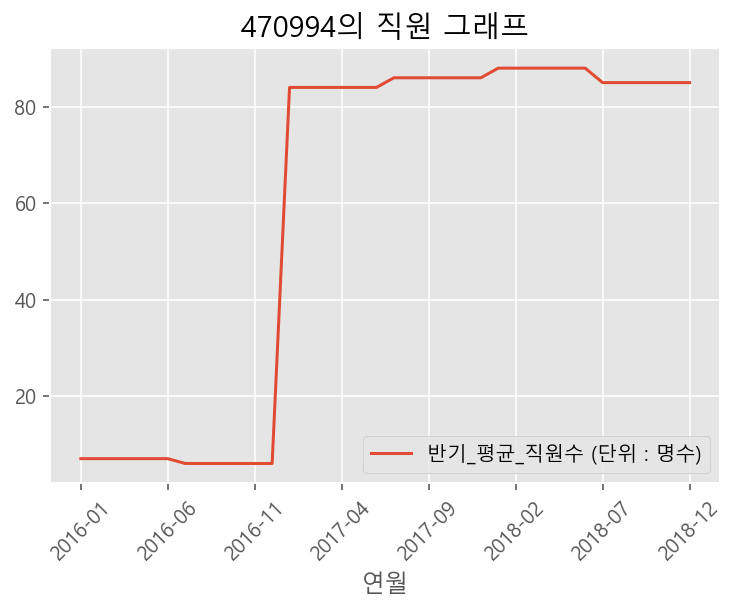

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


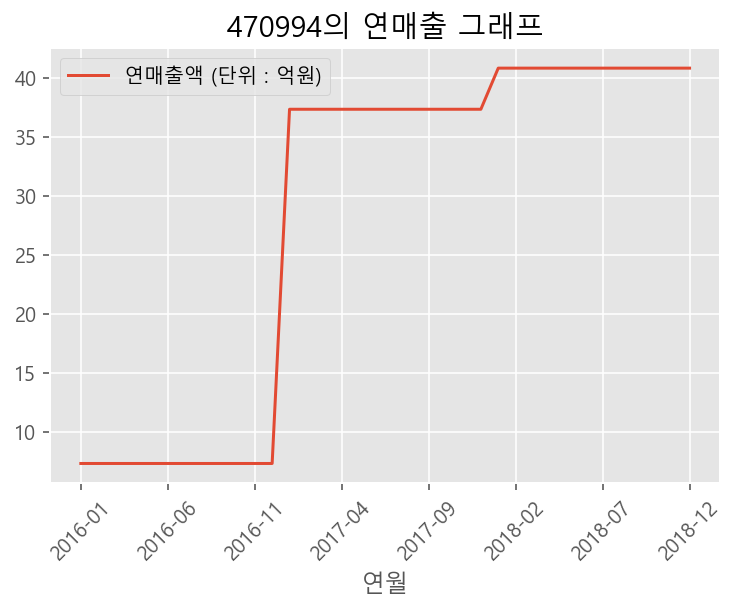

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


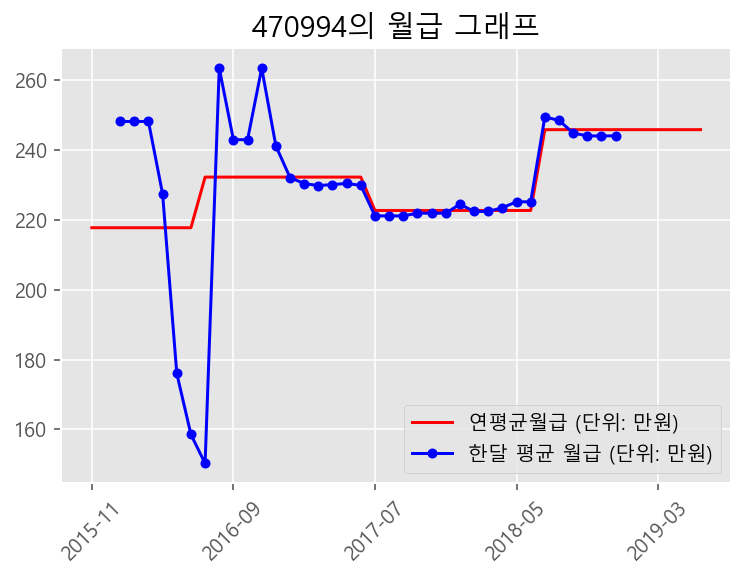

In [226]:
make_plot(470994)

In [94]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


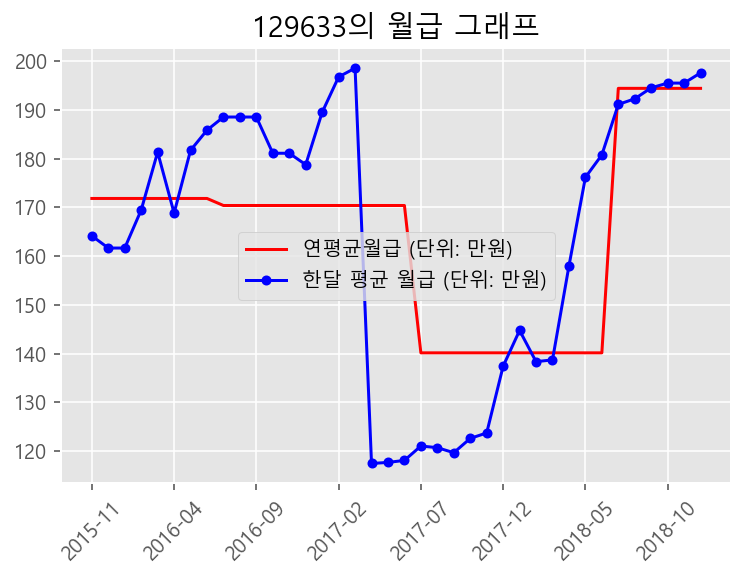

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


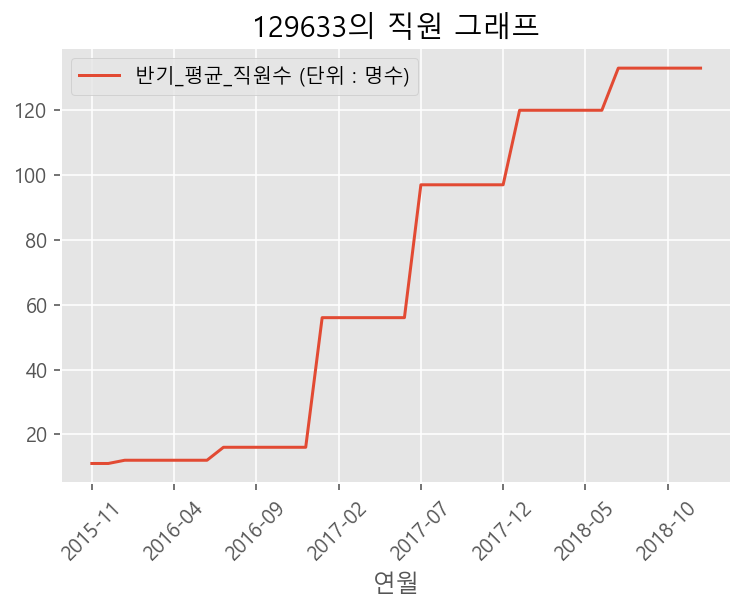

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


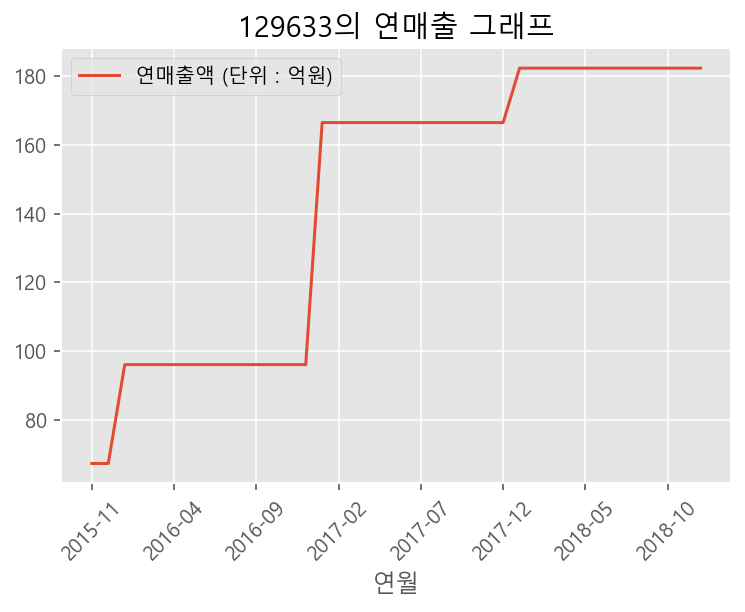

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


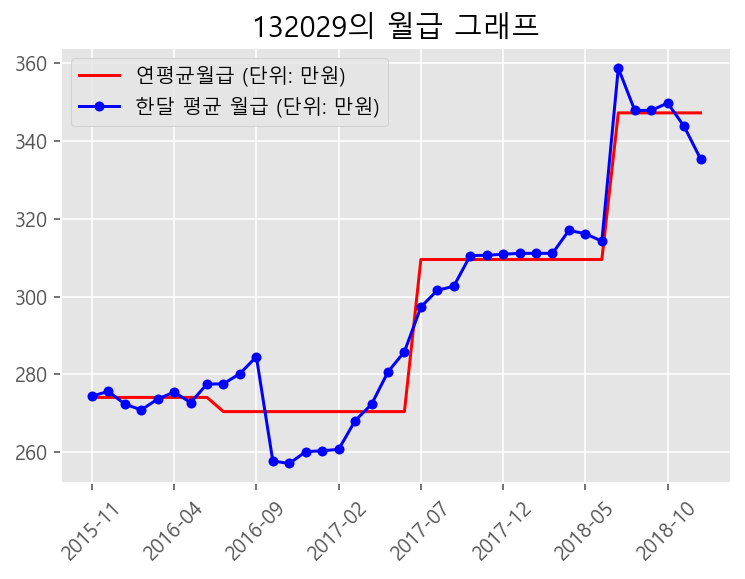

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


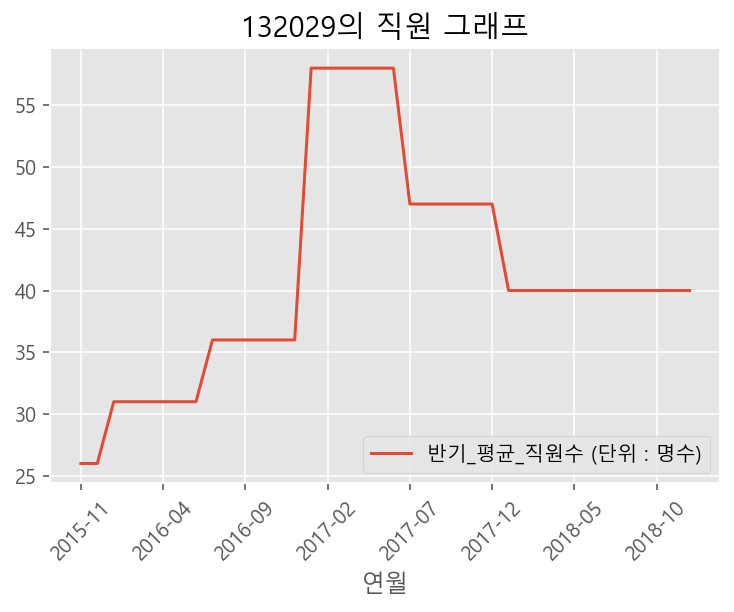

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


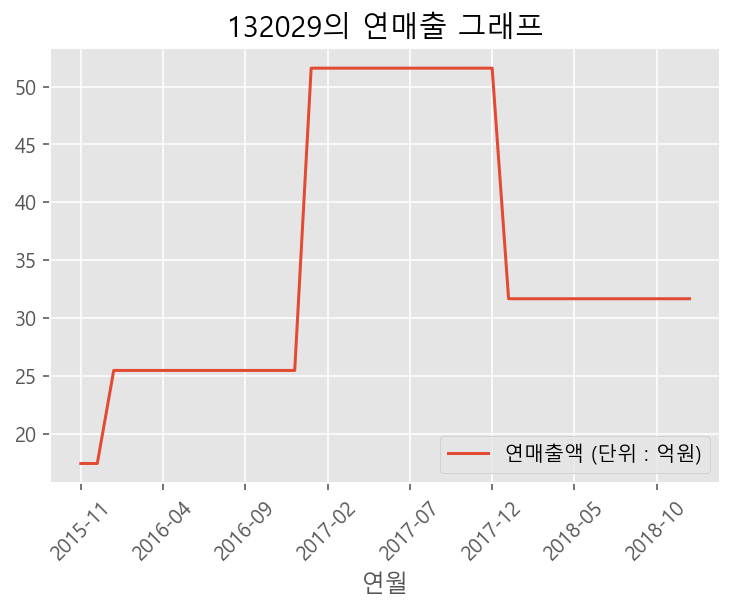

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


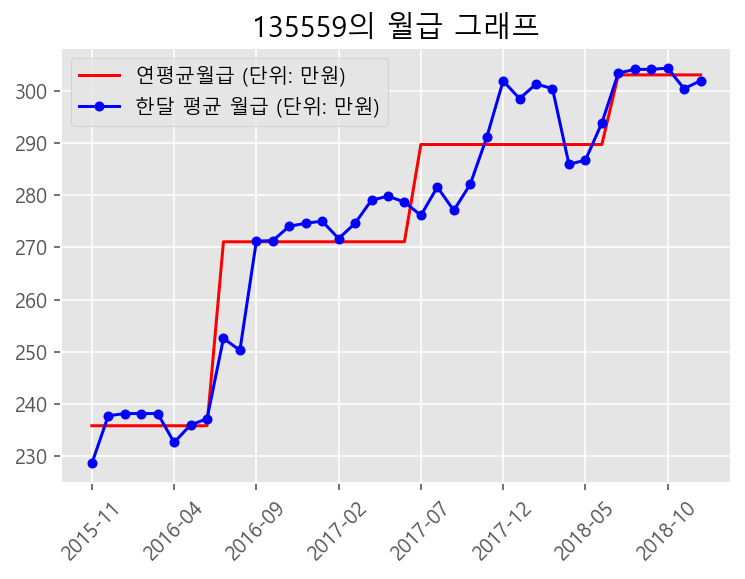

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


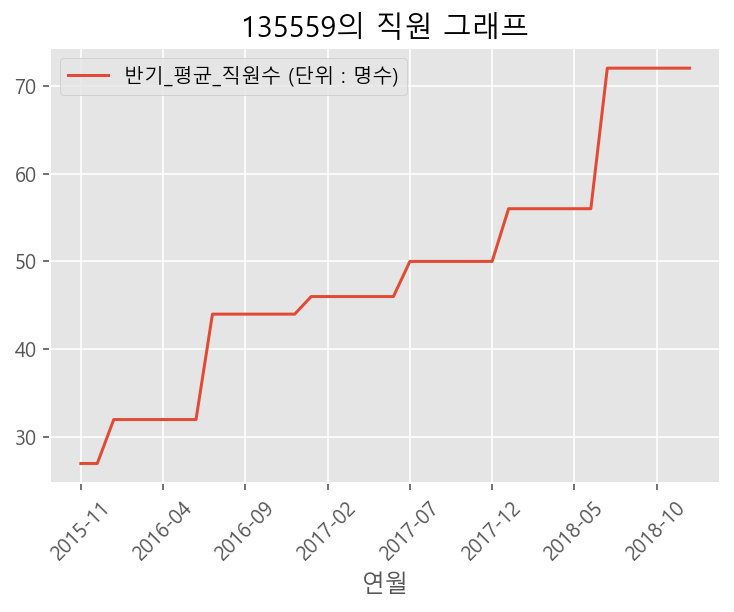

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


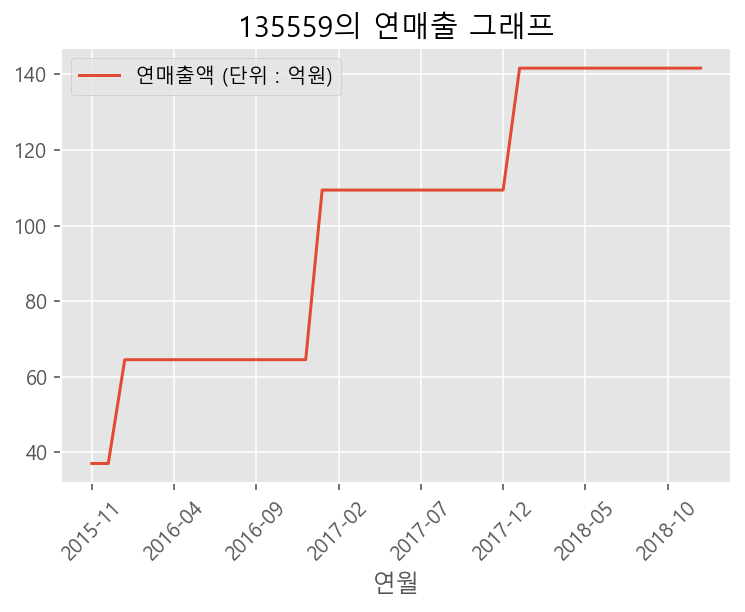

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


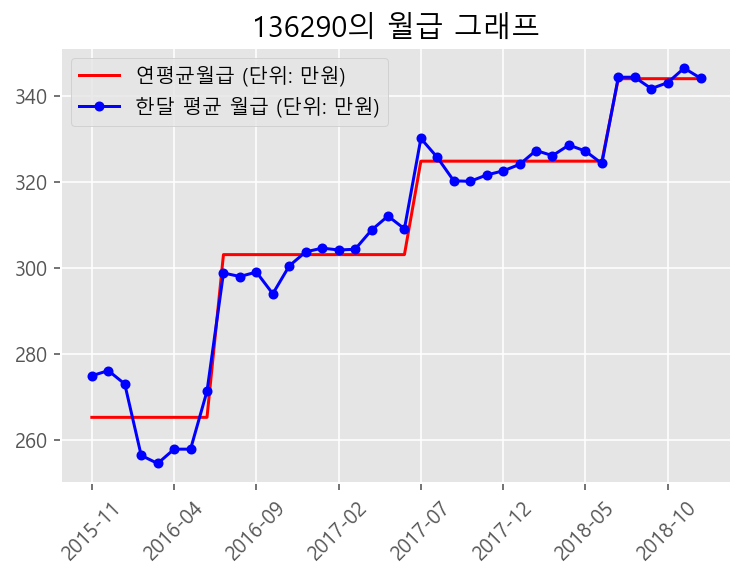

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


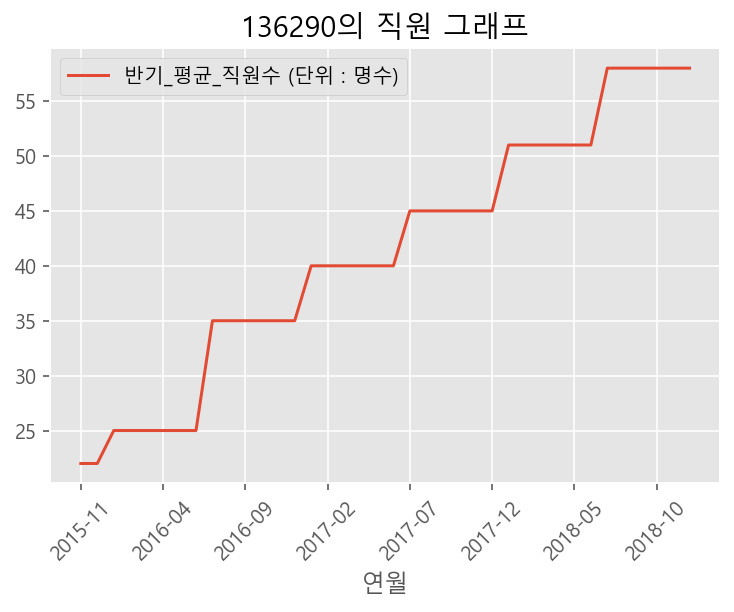

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


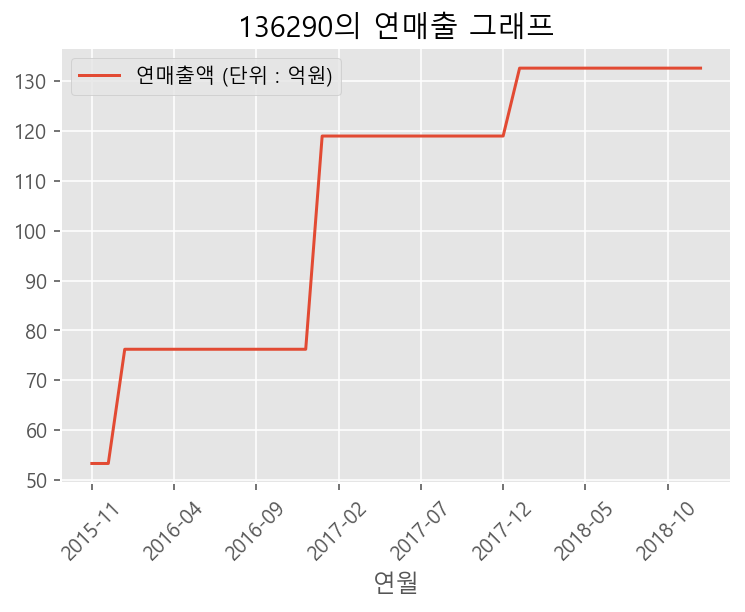

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


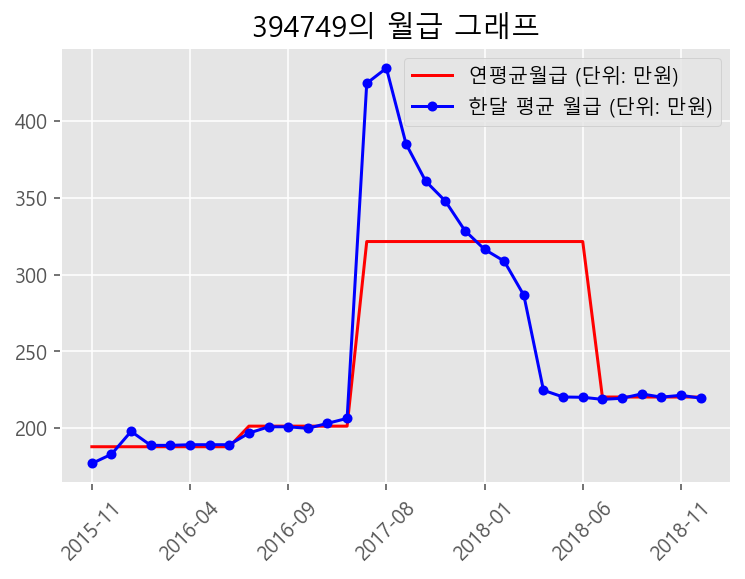

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


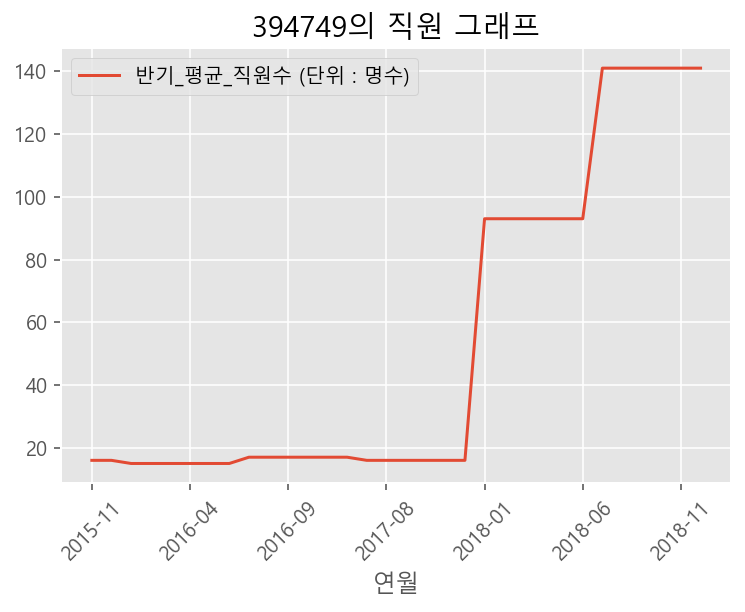

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


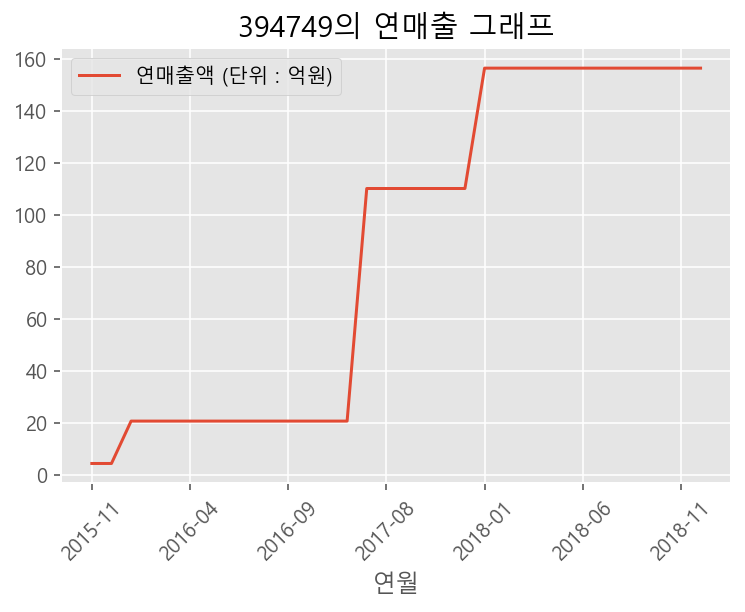

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


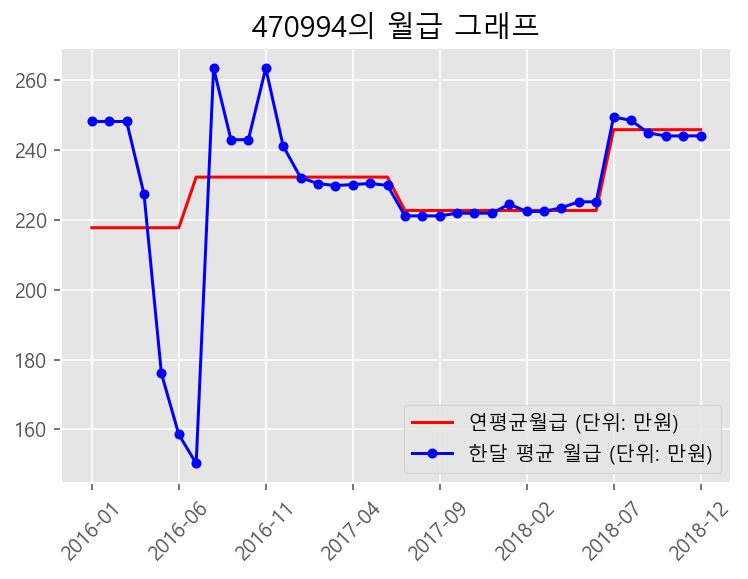

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


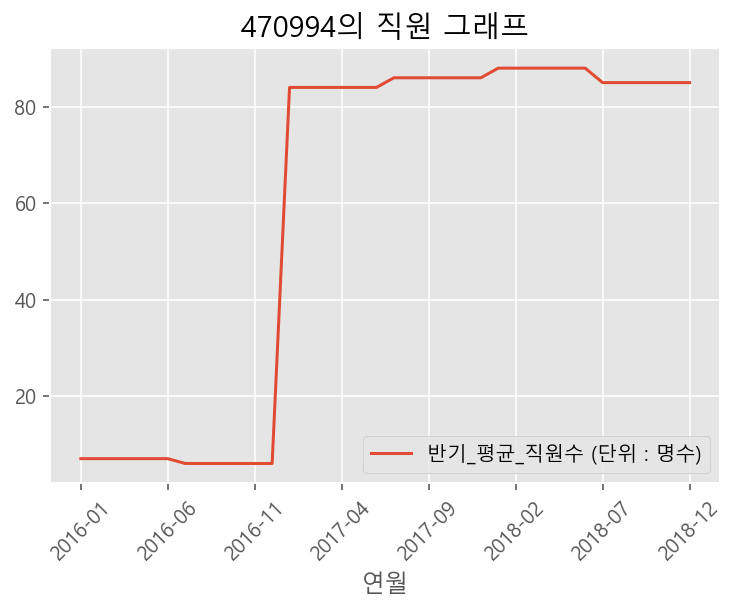

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


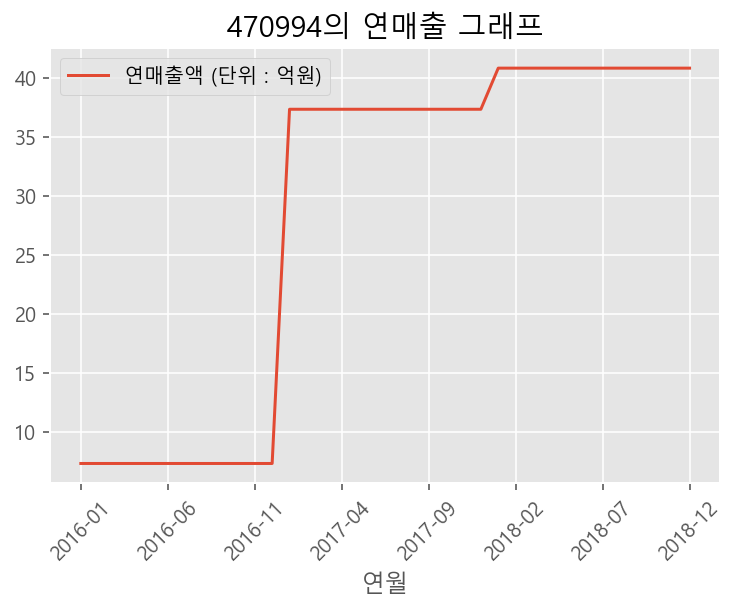

In [229]:
for i in ans:
    월급_그래프(i)
    직원_그래프(i)
    매출_그래프(i)

In [ ]:
ans

In [ ]:
매출표.loc[매출표['회사ID'].isin(ans),:]

In [ ]:
A = 매출표.loc[매출표['회사ID'].isin(ans), ['회사ID', '3년_매출_성장률']]
A

In [ ]:
B = 평균_월급표.loc[평균_월급표['회사ID'].isin(ans),['회사ID','평균']]
B['평균월급증가율'] = B['평균']
B = B[['회사ID', '평균월급증가율']]
B

In [ ]:
평균_직원표
C = 평균_직원표.loc[평균_직원표['회사ID'].isin(ans), ['회사ID', '2016-2018_평균']]
C['평균_직원_증가율'] = C['2016-2018_평균']
C = C[['회사ID', '평균_직원_증가율']]
C

In [ ]:
merge = pd.merge(A, B, on='회사ID', how='inner')

In [ ]:
merge = pd.merge(merge, C, on='회사ID', how='inner')

In [ ]:
merge

In [ ]:
# 129633 / 13559 / 470994 